# Component FDTD simulations

## Lumerical FDTD

You can write the [Sparameters](https://en.wikipedia.org/wiki/Scattering_parameters) for all components in the UBC `ubcpdk.components` PDK using lumerical FDTD plugin in gdsfactory

2022-11-13 11:37:36.507 | INFO     | gdsfactory.config:<module>:45 - Load '/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/gdsfactory' 6.0.1
/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-11-13 11:37:38.428 | INFO     | ubcpdk:<module>:36 - Found UBCpdk '1.8.0' installed at PosixPath('/usr/local/google/home/jmatres/ubc/ubcpdk')


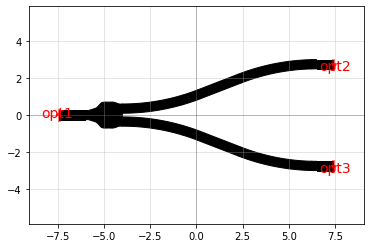

ebeam_y_1550: uid 1d162469, ports ['opt1', 'opt2', 'opt3'], references [], 18 polygons

In [1]:
import ubcpdk
import ubcpdk.components as pdk
import gdsfactory.simulation as sim
import matplotlib.pyplot as plot

component = pdk.ebeam_y_1550()
# ubcpdk.tech.write_sparameters_lumerical(component=component)
component

In [2]:
# df = ubcpdk.tech.get_sparameters_data_lumerical(component=ubcpdk.components.straight())

In [3]:
# sim.plot_sparameters(df)

## Meep

Meep in an open source FDTD library developed at MIT. 
See [docs](https://meep.readthedocs.io/en/latest/Python_Tutorials/GDSII_Import/) and [code](https://github.com/NanoComp/meep).

We will use the gdsfactory meep plugin to run simulation using meep.


Notice that most examples run with `resolution=20` so they run fast.

The resolution is in pixels/um so i reccommend that you run with at least `resolution=100` for 1/100 um/pixel (10 nm/ pixel)

In [4]:
import gdsfactory.simulation.gmeep as gm

2022-11-13 11:37:39.265 | INFO     | gdsfactory.simulation.gmeep:<module>:32 - Meep '1.24.0' installed at ['/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/meep']


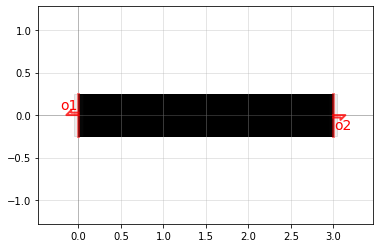

straight_length3: uid 41c27a49, ports ['o1', 'o2'], references [], 2 polygons

In [5]:
c = ubcpdk.components.straight(length=3)
c

[11:37:40] INFO     Using client version: 1.7.1                                ]8;id=550674;file:///usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/tidy3d/__init__.py\__init__.py]8;;\:]8;id=882650;file:///usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/tidy3d/__init__.py#95\95]8;;\

2022-11-13 11:37:40.622 | INFO     | gdsfactory.simulation.gtidy3d:<module>:54 - Tidy3d '1.7.1' installed at ['/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/tidy3d']
/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4494: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


<Figure size 432x288 with 1 Axes>

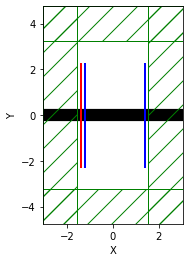

In [6]:
df = gm.write_sparameters_meep_1x1(component=c, run=False)

In [7]:
df = gm.write_sparameters_meep_1x1(component=c, run=True)

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4488: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep.create_structure(cell_size, dft_data_list_, pml_1d_vols_, pml_2d_vols_, pml_3d_vols_, absorber_vols_, gv, br, sym, num_chunks, Courant, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, extra_materials, split_chunks_evenly, set_materials, existing_s, output_chunk_costs, my_bp)
/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4491: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._set_materials(s, cell_size, gv, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, extra_materials, split_chunks_evenly, set_materials, existing_geps, output_chunk_costs, my_bp)
2022-11-13 11:37:50.151 | INFO     | gdsfactory.simulation.gmeep

<Figure size 432x288 with 1 Axes>

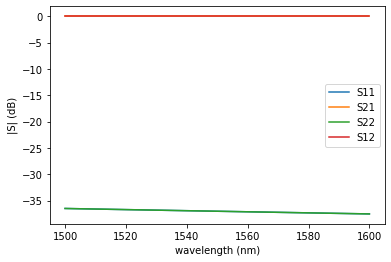

In [8]:
gm.plot.plot_sparameters(df)

<Figure size 432x288 with 1 Axes>

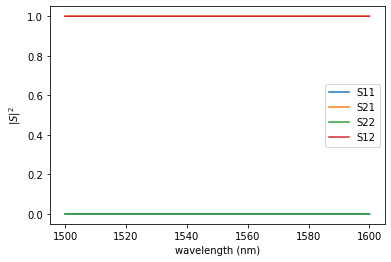

In [9]:
gm.plot.plot_sparameters(df, logscale=False)

<Figure size 432x288 with 1 Axes>

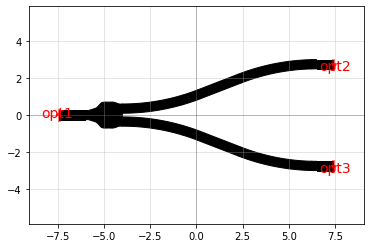

<Figure size 432x288 with 1 Axes>

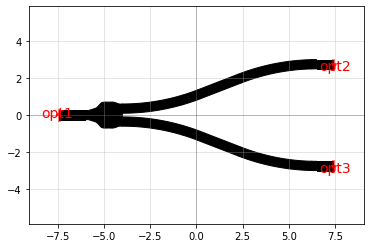

ebeam_y_1550: uid 1d162469, ports ['opt1', 'opt2', 'opt3'], references [], 18 polygons

In [10]:
c = ubcpdk.components.ebeam_y_1550()
c

/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/gdsfactory/simulation/gmeep/get_simulation.py:148: UserWarning: port_source_name='o1' not in ['opt1', 'opt2', 'opt3']
  warnings.warn(f"port_source_name={port_source_name!r} not in {port_names}")
/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/gdsfactory/simulation/gmeep/get_simulation.py:151: UserWarning: Selecting port_source_name='opt1' instead.
  warnings.warn(f"Selecting port_source_name={port_source_name!r} instead.")
/usr/local/google/home/jmatres/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4494: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


<Figure size 432x288 with 1 Axes>

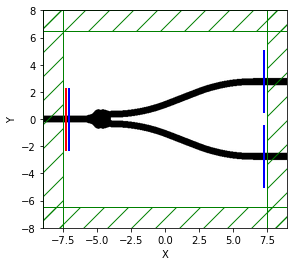

In [11]:
df = gm.write_sparameters_meep(component=c, run=False) # lr stands for left-right ports

<Figure size 432x288 with 1 Axes>

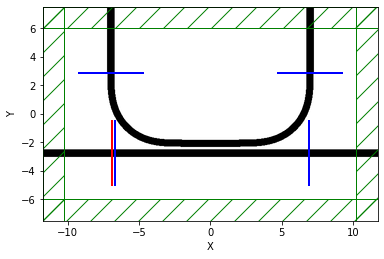

In [12]:
import gdsfactory as gf

df = gm.write_sparameters_meep(gf.components.coupler_ring(), xmargin=3, ymargin_bot=3, run=False) # lr stands for left-right ports